<h1 style='color:green'> Face Recognization -- Data-Cleaning Model Building

In [2]:
#allows you to perform image processing and computer vision tasks
!pip install opencv-python


In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
#Read an image --> (x, y, rgb)
img = cv2.imread("C:/Users/shaik/OneDrive/Desktop/face_recognization/testImages/msd (1).jpg")
img.shape

(612, 391, 3)

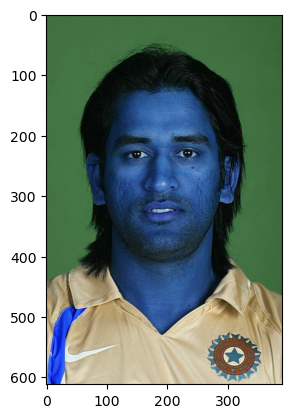

In [5]:
plt.imshow(img)

In [6]:
#show the gray image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(612, 391)

In [7]:
#n-dimentional array [0-255]
gray

array([[ 91,  91,  91, ...,  83,  83,  83],
       [ 91,  91,  91, ...,  83,  83,  83],
       [ 91,  91,  91, ...,  83,  83,  83],
       ...,
       [140, 199, 148, ..., 198, 173, 155],
       [132, 191, 152, ..., 197, 172, 153],
       [127, 183, 158, ..., 197, 171, 152]], dtype=uint8)

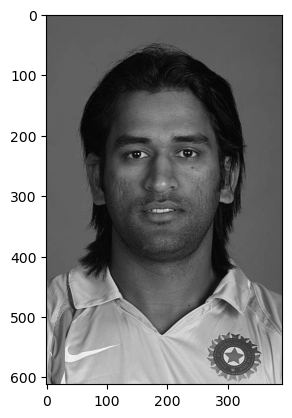

In [8]:
plt.imshow(gray, cmap='gray')

<h2>Detect face and eyes</h2>

<h4>Link : https://docs.opencv.org/3.4/d2/d99/tutorial_js_face_detection.html

haarcascade : It allows to detect the different features of the face

In [9]:
face_cascade = cv2.CascadeClassifier("D:\Istiyak\Desktop_Content\Courses\Data_Science\CodeBasics\projects\FaceRecognization\model\opencv\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("D:\Istiyak\Desktop_Content\Courses\Data_Science\CodeBasics\projects\FaceRecognization\model\opencv\haarcascades\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5) #gray -- image
faces #(x, y, width, height)

array([[ 78, 140, 229, 229]])

In [10]:
#draw the face

(x,y,w,h) = faces[0]
x,y,w,h

(78, 140, 229, 229)

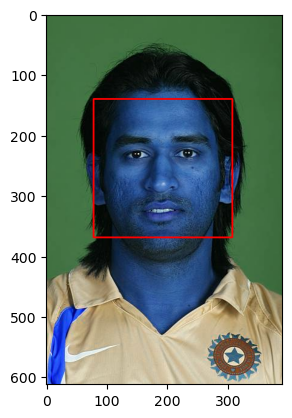

In [11]:
#Draw the rectange shape around the face

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

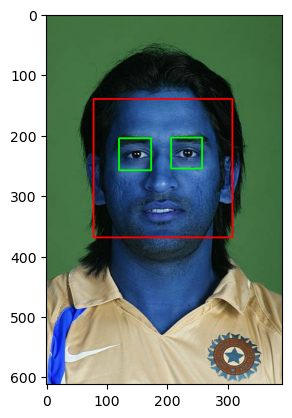

In [12]:
# paste the code from the documentation
#Detect the 2-eyes

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

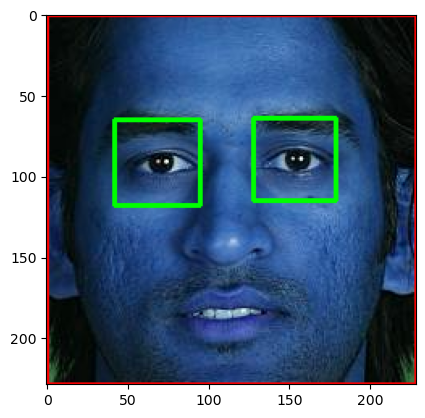

In [13]:
#Plot only ROI[Region of Interest] region -- Cropped Image
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

<h3> Get the cropped images

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2: 
                return roi_color
                

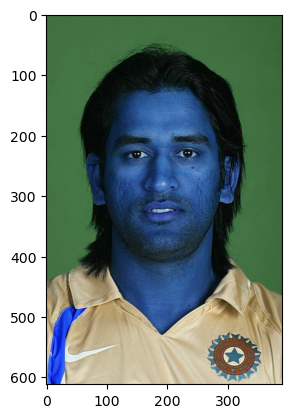

In [15]:
#Origional Image
original_image = cv2.imread("C:/Users/shaik/OneDrive/Desktop/face_recognization/testImages/msd (1).jpg")
plt.imshow(original_image)

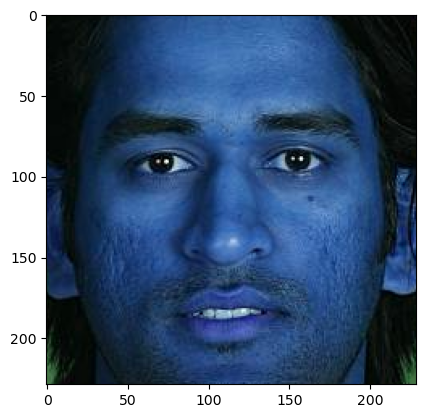

In [16]:
#Cropped Image
cropped_image = get_cropped_image_if_2_eyes("C:/Users/shaik/OneDrive/Desktop/face_recognization/testImages/msd (1).jpg")
plt.imshow(cropped_image)

In [17]:
#If both eyes are not clearly visible -- return nothing[Face is obstructed]
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("C:/Users/shaik/OneDrive/Desktop/face_recognization/testImages/msd_googles.jpg")
cropped_image_no_2_eyes

In [18]:
#Check the destructed image
#Read an image --> (x, y, rgb)
imgDestructed = cv2.imread("C:/Users/shaik/OneDrive/Desktop/face_recognization/testImages/msd_googles.jpg")
imgDestructed.shape

(612, 408, 3)

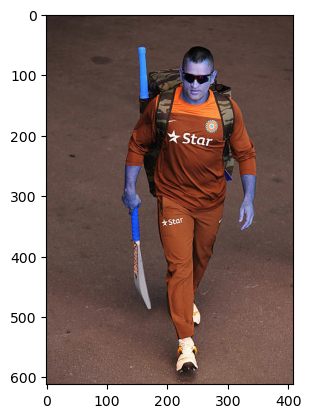

In [19]:
#Because wearing a glass so, eyes is not properly visible
plt.imshow(imgDestructed)

<h2>Store the cropped images in a different folder 

In [26]:
path_to_data = "C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/"
path_to_cr_data = "C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/"

In [27]:
#Save the path into the python list
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [28]:
img_dirs

['C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/apj_kalam',
 'C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/bhagat_singh',
 'C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/br_ambedkar',
 'C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/ms_dhoni',
 'C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/swami_vivek_ananda']

In [29]:
# If crop folder doesn't exist , create it
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)#If folder already exist remove it 
os.mkdir(path_to_cr_data)#Create new folder

In [30]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1] #give last element of the img_dirs list
    print(celebrity_name)

apj_kalam
bhagat_singh
br_ambedkar
ms_dhoni
swami_vivek_ananda


In [29]:
    #celebrity_file_names_dict[celebrity_name] = []
    #It will create the seprated folder for each celebrities inside the cropped folder
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)

Generating cropped images in folder:  C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/swami-vivek-ananda


In [31]:
#Generating cropped folder for each celebrity

cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)#Store the name of the celebrities into the dic.
            count += 1

Generating cropped images in folder:  C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/apj_kalam
Generating cropped images in folder:  C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/bhagat_singh
Generating cropped images in folder:  C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/br_ambedkar
Generating cropped images in folder:  C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/ms_dhoni
Generating cropped images in folder:  C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/swami_vivek_ananda


<h2>---------------------------Manually Delete the unnecessary images locally----------------------------------

<h2 style='color:red'>Wavelet Transformation

In [32]:
import numpy as np
import pywt
import cv2   

In [33]:
cropped_img = np.array(roi_color)
cropped_img.shape

(136, 136, 3)

In [34]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

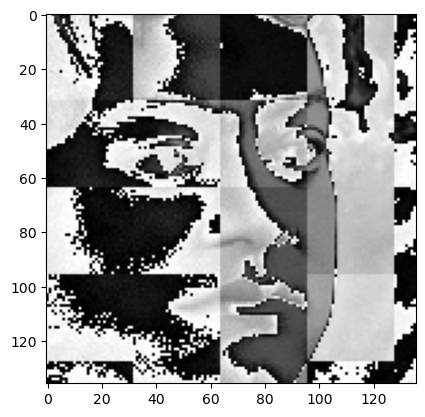

In [35]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [36]:
#Vertically stacked the images

celebrity_file_names_dict

{'apj_kalam': ['C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/apj_kalam/apj_kalam1.png',
  'C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/apj_kalam/apj_kalam2.png',
  'C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/apj_kalam/apj_kalam3.png',
  'C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/apj_kalam/apj_kalam4.png',
  'C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/apj_kalam/apj_kalam5.png',
  'C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/apj_kalam/apj_kalam6.png',
  'C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/apj_kalam/apj_kalam7.png',
  'C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/apj_kalam/apj_kalam8.png',
  'C:/Users/shaik/OneDrive/Desktop/face_recognization/model/dataset/cropped/apj_kalam/apj_kalam9.png',
  'C:/Users/shaik/OneDrive/Desktop/face_recognization/model/

In [37]:
#Assign the number to the celebrities
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'apj_kalam': 0,
 'bhagat_singh': 1,
 'br_ambedkar': 2,
 'ms_dhoni': 3,
 'swami_vivek_ananda': 4}

In [38]:
#Go through each and every image
#Create the stack of the wavelet and simple-image
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is  None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)#Convert it in the wavelet image form
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))#Stacked vertically
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [39]:
len(X)#Total 190 images we have.

189

In [40]:
len(X[0])#Size of each one

4096

In [41]:
X[0]

array([[ 18],
       [ 32],
       [ 94],
       ...,
       [173],
       [205],
       [  3]], dtype=uint8)

In [42]:
y[0]

0

In [43]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(189, 4096)

<h2>----------------------------------------------Data Cleaning Is Done---------------------------------------------

<h1 style='color:green'> Train the Model

Use the SVM for classification

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Scale the data then, Create the SVM model

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8958333333333334

In [46]:
len(X_test)

48

<h3>Precision - how many retrieved items are relevant<br>
                         Vs<br>
    Recall - how many relevant items are retrieved </h3> 
    
    Example: 6/10 => Precision-60%, Recall=6

F1 (Score)Link : https://en.wikipedia.org/wiki/F-score

In [47]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8
           2       0.71      0.62      0.67         8
           3       0.87      0.93      0.90        14
           4       0.91      0.91      0.91        11

    accuracy                           0.90        48
   macro avg       0.90      0.89      0.89        48
weighted avg       0.89      0.90      0.89        48



<h1>Grid Search -- To Find the Best Model

In [48]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [49]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [50]:
#Step1: Scale the data
#Step:2: Use the model to train

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.822167,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.623645,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.850493,{'logisticregression__C': 1}


In [51]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [52]:
#Check the score
best_estimators['svm'].score(X_test, y_test)

0.8958333333333334

In [53]:
best_estimators['random_forest'].score(X_test, y_test)

0.5833333333333334

In [54]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.875

In [55]:
#Save the best estimator
best_clf = best_estimators['svm']

In [56]:
#Draw the confusion metrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  0,  6,  1,  1],
       [ 0,  0,  1, 13,  0],
       [ 0,  1,  1,  0,  9]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

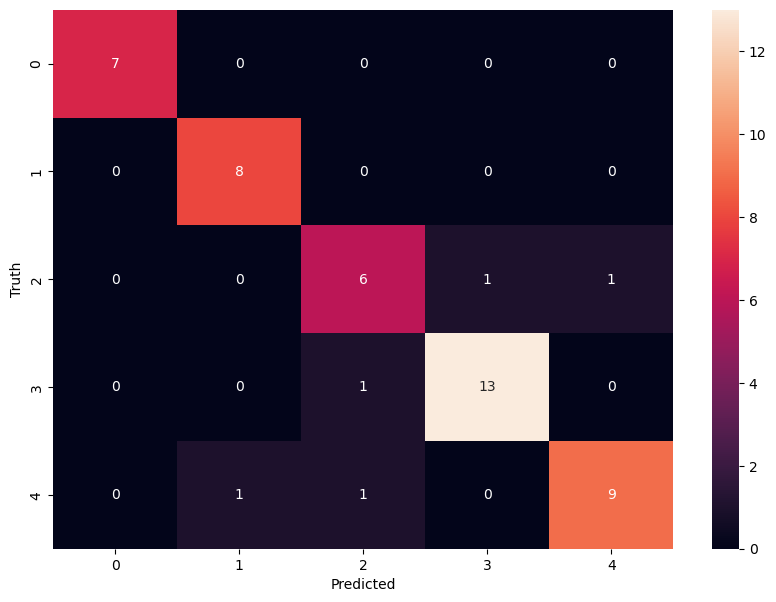

In [57]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
class_dict

{'apj_kalam': 0,
 'bhagat_singh': 1,
 'br_ambedkar': 2,
 'ms_dhoni': 3,
 'swami_vivek_ananda': 4}

<h1> Save the trained Model 

In [59]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'C:/Users/shaik/OneDrive/Desktop/face_recognization/artifacts/saved_model.pkl') 

['C:/Users/shaik/OneDrive/Desktop/face_recognization/artifacts/saved_model.pkl']

<h1> Save Class Dictionary

In [60]:
import json
with open("C:/Users/shaik/OneDrive/Desktop/face_recognization/artifacts/class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

<h1>Notes

1)Save these files['class_dictionary.json', 'saved_model.pkl'] in the artifacts folder<br>
2)Set the base-interpreter of pychrm : "./anaconda3/python.exe" -- Because using flask frame work OR<br>
3)Run these commands:<br>

python -m pip install flask<br>
python -m pip list<br>
pip install PyWavelets==0.2.2<br>
pip install scikit-learn<br>


4)Convert the image into base64.(https://www.base64-image.de/)<br>
5)Final test the with real images.<br>
6)Set the UI -Visual Studio.<br>
-- Test UI: F12 -- Will provide you debugging of the function(.JS)<br>
-- Set the debug in the DOM and upload the image and classify it -: Will get the datURL which contains base64 (As an input)<br>
dataURL:"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAA
7)Establish the connection between UI(Post) and Server(Response)<br>

Error1: Check the working directory to encounter the relative path error.<br>

import os<br>

cwd = os.getcwd() # Get the current working directory (cwd) <br>
files = os.listdir(cwd) # Get all the files in that directory <br>
print("Files in %r: %s" % (cwd, files))<br>

--------------------------Add this code into your flask app ---------------------------------
import os<br>
os.chdir(r'D:\Istiyak\Desktop_Content\Courses\Data_Science\CodeBasics\projects\FaceRecognization\server')<br>

<h1> Deployment

1) Download the nginx zip file :  http://nginx.org/en/download.html <br>
2)Un-Zip it and paste it C:/ProgramFiles<br>
3)Run the ngin-.exe file and check the localhost is serve the ngin-x welcome page or not.<br>
4)Edit this from conf/nginx.conf <br>
        location / {
            root   html;
            index  index.html index.htm;
        }<br><br><br>
        
        
5)Set the app.js url  : var url = "/api/classify_image"; <br><br>

6)Add this code into the nginx.conf : To know the find web-page on the 5000 port<br>
        location /api/ {<br>
            rewrite ^/api(.*) $1 break;<br>
            proxy_pass   http://127.0.0.1:5000;<br>
        }<br><br>
        
7)Login on the AWS : https://aws.amazon.com/ <br>
8)Launch the instance -- download the .pem file and paste it C:/user/.ssh/  <br>
--------------------------------------------------------------------------------------------------------------------------<br>
9)Open the GitBash in project directory -- Paste this command -- third portion will get from the aws/instance /connect<br>

<b>ssh -i "C:\Users\shaik\.ssh\gpfr.pem" DNS@URL </b> <br><br>

-----------Now you are on the EC2 instance---------<br>
Chech this commands on GitBash:<br>
pwd<br>
ls /etc/init.d <br><br>


10)Download the WINSCP(Its main function is file transfer between a local and a remote computer.) : Paste these commands<br>
 -- public DNS : from AWS <br>
 -- Use authentication for password and --upload the .pem file <br>
 -- Username : ec2-user  <br>
 -- and LOGIN <br>
 
 --- It will create the connection with the AWS in the WINSCP.<br>
 
 11)Paste the local code into the remote folder in WINSCP.<br>
 ----------------------------------------------------------<br>
 
 12)Git-Bash write the code: <br>
 -- sudo apt-get update  <br>
 -- sudo apt install nginx  <br>
 --sudo service nginx start <br>
 --sudo service nginx stop <br>
 --sudo service nginx restart <br>

 -- sudo service nginx status <br>
 -- copy the web url from (AWS public DNS)and paste it chrome check the nginx running it<br><br>
 
 ---Where to serve??<br>
 -- cd /etc/nginx/  <br>
 -- pwd <br>
 -- ll (show the all the files it has) <br>
 -- ls (show the all the files it has) <br>
 
 -----Check the nginx.conf ---  <br>
 --- less nginx.conf  <br>
 --press ‘q’. This will enable you to enter command again.<br>
 -- less sites-enabled/default  <br>
 -- less /var/www/html/index.nginx-debian.html  (this is a serving page)<br>
 
 ----We will get the source code of the serve page---- <br>
 
 --- cd sites-enabled/ <br>
 -- ls  <br>
 -- ll (You will get the default configurations)  <br>
 
 -- Disable the default configurations. <br>
 -- sudo unlink default  <br>
 -- cd ../sites-available/  (enter into the sites-available)<br>
 
 --- Here also default file -- I want to create the gpfr.conf -- Paste this code<br>
 
 --Vreare the file--<br>
 --sudo vim gpfr.conf (create the file)<br>
 -- i (insert mode enable)<br>
 -- esc (exit from the insert mode)
 -- :wq (save the file)

<p>
server {
	listen 80;

	server_name FaceRecognizer;

	root /home/ubuntu/faceRecognizer/UI;
	index app.html;

	location /api/ {
		rewrite ^/api(.*) $1 break;
		proxy_pass http://127.0.0.1:5000;
	}
}
</p>
<br>
 
 -------------It will send the request on the 5000 port and we will run the flask server on the 5000 port. <br><br>
 
 --<h1>Create the simlings</h1> --- <br>
 --- cd ../sites-enabled/  <br>
 -- sudo ln -s /etc/nginx/sites-available/gpfr.conf  /etc/nginx/sites-enabled/ <br>
 --- ll (to check the simlings) <br>
 
 ------------------------------------- <br>
 -- sudo service nginx restart (whatever available inside the sites-available directory we can use in sites-enabled dir.)<br>
 --sudo service nginx status <br>
 
 <h1> ------- Fronted Served Successfully ------ </h1> <br>
 
 ------------------------------------------------------------------<br>
 
  <h1> -------Backend ------ </h1>
  -- cd ~ (Go to the home directory in Git-Bash) <br>
  -- cd faceRecognizer/server/  <br>
  -------------- but install the all necessary files  which is required--------------<br>
  --ll
  --check python3/pip3 <br>
  -- ctrl+Z to out <br>
  -- sudo apt install python3-pip <br>
  -- sudo pip3 install -r requirments.txt <br>
  -- python3 server.py <br>
 

<h1>deploy the model permanently</h1>
screen -R deploy python3 server.py

Git-Bash Medium : https://medium.com/@srijon/stuck-in-git-bash-command-line-a961f7c24c0e

In [ ]:
<h1>Errors solutions of deployments</h1>

1) Check the error of the nginx:  sudo nano /var/log/nginx/error.log <br>
2) Multiple simlinks : /etc/nginx/sites-enabled$ sudo unlink inside <br>

